# Malawi 2019 Tripartite Election Online Text Analysis [Nebula Research]

## Table of contents


### Background & Objectives

1. Understanding the political candidate popularity trends over time
2. Capture common responses to key events in the pre election and post election periods
3. Understand the presence and trends of hate speech
4. Understanding the themes that are associated with candidates and their affiliated political parties


### Methods
#### meta data and data aquisition
#### Analysis
#### Visualizations
plotly user name and api key: Often87, 3i7yj51i8gpn2qraoI53
### Results

Scraping commments from mw24post

In [13]:
import ipywidgets as widgets
from ipywidgets import interact, interact_manual

In [1]:
from urllib.request import urlopen
#html = urlopen("https://malawi24.com/category/politics/")
html = urlopen("https://www.nyasatimes.com/more-details-in-k53bn-uniform-gate-emerge-despite-karims-gag-order/")
r=print(html.read())


r

HTTPError: HTTP Error 403: Forbidden

In [2]:
from bs4 import BeautifulSoup
import requests

url = 'https://malawi24.com/2019/02/01/group-accuses-chilima-of-promoting-hate/'
page = requests.get(url)
soup = BeautifulSoup(page.content, 'lxml')
for content in soup.select("[id^='comments'] p"):
    x=print(content.text)
    
    

 
They’re fools, narrow minded ,and stupid paw paws mxiiiim
 
If you don’t have anything to report , stay put.
 
Inu alubwi lubwi mumafuna kuti ayankhule mupezepo chonena zaziiiiiiiiii chibanziiii

 








In [14]:
import pandas as pd
data= pd.DataFrame

data=pd.read_json('../Data/skc.json')
drp=data.drop(['fullname', 'html', 'id', 'user', 'url'], axis=1)
drp.to_csv('dropped.csv')
drp['date'] = [d.date() for d in drp['timestamp']]
drp['time'] = [d.time() for d in drp['timestamp']]
pd.set_option('display.max_colwidth', -1)
#interactive controls for jupyternotebook.
@interact
def show_articles_more_than(column=['likes', 'replies', 'retweets'], value=(10, 100, 10)):
   return drp.loc[drp[column] > value]
    
    


interactive(children=(Dropdown(description='column', options=('likes', 'replies', 'retweets'), value='likes'),…

In [3]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

print(__version__)

3.6.1


In [23]:
import plotly
import plotly.graph_objs as go

plotly.offline.plot({
    "data": [go.Scatter(x=drp['date'], y= drp['likes'])],
    "layout": go.Layout(title="hello world")
}, auto_open=True)

'file://C:\\Users\\User\\Projects\\nebula-research-2019-PRE-TPE-social-media-NLP-\\Notebooks\\temp-plot.html'

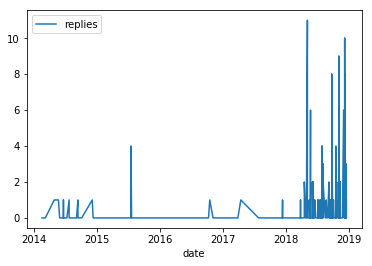

In [50]:
drp.plot(kind='line', x='date', y='replies')

In [22]:
import plotly
import plotly.graph_objs as go

plotly.offline.init_notebook_mode(connected=True)

plotly.offline.iplot({
    "data": [go.Scatter(x=drp['date'], y= drp['likes'])],
    "layout": go.Layout(title="Time series analysis")
})

In [35]:
widgets.DatePicker(
    description='Pick a Date',
    disabled=False
)

DatePicker(value=None, description='Pick a Date')

In [2]:
import plotly.graph_objs as go
import plotly.plotly as p

ModuleNotFoundError: No module named 'plotly'

In [1]:
import urllib.request
from bs4 import BeautifulSoup
url = "https://www.nyasatimes.com/category/politics/"

# Opening the URL as Browser, not as python urllib after getting a 403 error previously
page=urllib.request.Request(url,headers={'User-Agent': 'Mozilla/5.0'}) 
infile=urllib.request.urlopen(page).read()
data = infile.decode('ISO-8859-1') # Read the content as string decoded with ISO-8859-1

soup = BeautifulSoup(infile, 'html5lib')


#soup.p
soup.find_all('div', class_="uv-thumb-article-wrap") #+ soup.find_all('div', class_="wc-thread-wrapper")

#viz=soup.find_all('div')


for link in soup.find_all('a'):
    weblist = link.get('href')
    print(weblist)
    

    
#print(data) Print the data to the screen

http://www.africa.airtel.com/wps/wcm/connect/africarevamp/Malawi/
http://www.africa.airtel.com/wps/wcm/connect/africarevamp/Malawi/
https://www.nyasatimes.com/
http://www.beforward.jp/?utm_source=media&utm_medium=display&utm_term=MS2018030100001&utm_content=NewSaleBanner&utm_campaign=NyasatimesTop_NewSaleBanner
http://www.beforward.jp/?utm_source=media&utm_medium=display&utm_term=MS2018030100001&utm_content=NewSaleBanner&utm_campaign=NyasatimesTop_NewSaleBanner
#content
http://www.nyasatimes.com/
https://www.nyasatimes.com/category/national/
https://www.nyasatimes.com/calvalry-churchs-apostle-mbewe-says-dont-vote-for-leaders-who-keep-grudges/
https://www.nyasatimes.com/calvalry-churchs-apostle-mbewe-says-dont-vote-for-leaders-who-keep-grudges/
https://www.nyasatimes.com/uladi-mussa-back-in-court/
https://www.nyasatimes.com/uladi-mussa-back-in-court/
https://www.nyasatimes.com/usi-risks-arrests-police-investigate-utms-veep-gp-certificate/
https://www.nyasatimes.com/usi-risks-arrests-pol

In [6]:
import pandas as pd

#defining the dataframe for collecting online news outlet posts on political candidates and their related statistics
postMetaData = ['PostText', 'DatePosted', 'Comments', 'sentiment']
postDF = pd.DataFrame(columns=postMetaData)
postDF

,PostText,DatePosted,Comments,sentiment


include real time web scraping and scraping code